In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [145]:
cba_df = pd.read_csv('Online Retail.csv')
cba_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [146]:
cba_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


In [147]:
cba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [148]:
i=cba_df[cba_df['UnitPrice']<=0].index
cba_df.drop(i,inplace=True)
cba_df.describe()

,Quantity,UnitPrice,CustomerID
count,539392.000000,539392.000000,539392.000000
mean,9.845904,4.673648,15287.600185
std,215.412652,94.614722,1488.109389
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,14359.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16265.000000
max,80995.000000,38970.000000,18287.000000


In [149]:
i=cba_df[cba_df['Quantity']<=0].index
cba_df.drop(i,inplace=True)
cba_df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,530104.000000
mean,10.542037,3.907625,15292.571875
std,155.524124,35.915681,1484.197955
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14383.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16265.000000
max,80995.000000,13541.330000,18287.000000


In [150]:
cba_df['Amount']=cba_df['Quantity']*cba_df['UnitPrice']
cba_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [151]:
cba_df.describe()

,Quantity,UnitPrice,CustomerID,Amount
count,530104.000000,530104.000000,530104.000000,530104.000000
mean,10.542037,3.907625,15292.571875,20.121871
std,155.524124,35.915681,1484.197955,270.356743
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,14383.000000,3.750000
50%,3.000000,2.080000,15287.000000,9.900000
75%,10.000000,4.130000,16265.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [152]:
cba_df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2323
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2017
PARTY BUNTING                         1706
LUNCH BAG RED RETROSPOT               1594
                                      ... 
SET/5 RED SPOTTY LID GLASS BOWLS         1
FRYING PAN RED POLKADOT                  1
PEG BAG APPLE DESIGN                     1
CAMOUFLAGE DOG COLLAR                    1
PAPER CRAFT , LITTLE BIRDIE              1
Name: count, Length: 4026, dtype: int64

In [153]:
cba_df['CustomerID'].value_counts()

CustomerID
15287    132240
17841      7847
14911      5675
14096      5111
12748      4595
          ...  
13135         1
13106         1
18268         1
15118         1
17846         1
Name: count, Length: 4338, dtype: int64

In [154]:
cba_df=cba_df[cba_df['Country'] != 'Unspecified']


In [155]:
cba_df['InvoiceDate'] = pd.to_datetime(cba_df['InvoiceDate'])
cba_df['Date'] = cba_df['InvoiceDate'].dt.date
cba_df['Time'] = cba_df['InvoiceDate'].dt.strftime('%H:%M:%S')

In [156]:
cba_df['Time of Day'] = ['Morning' if x < 12 else ('Afternoon' if x < 16 else ('Evening' if x < 20 else 'Night')) for x in cba_df['InvoiceDate'].dt.hour]
cba_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Time,Time of Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,08:26:00,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,08:26:00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,Morning


<Axes: xlabel='Time of Day'>

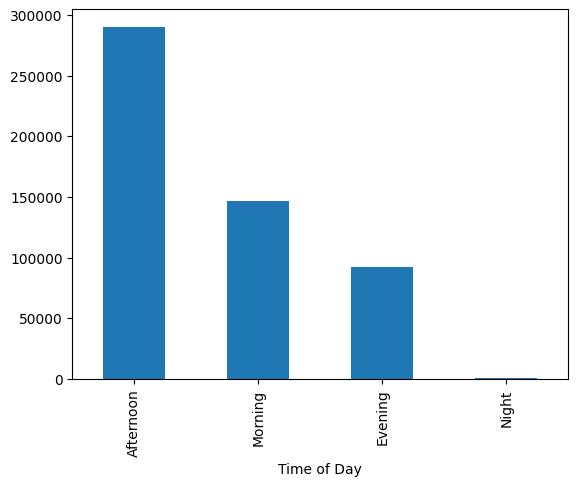

In [157]:
cba_df['Time of Day'].value_counts().plot(kind='bar')

In [158]:
country_sales = cba_df.groupby(['Country', 'Description']).agg({'Quantity': 'sum', 'UnitPrice': 'first'}).reset_index()
country_sales.rename(columns={'Quantity': 'Total Quantity'}, inplace=True)

In [159]:
country_sales = country_sales.sort_values(by=['Country', 'Total Quantity'], ascending=[True, False])
country_sales

,Country,Description,Total Quantity,UnitPrice
287,Australia,MINI PAINT SET VINTAGE,2952,0.55
377,Australia,RABBIT NIGHT LIGHT,1884,2.08
386,Australia,RED HARMONICA IN BOX,1704,1.06
409,Australia,RED TOADSTOOL LED NIGHT LIGHT,1344,1.45
210,Australia,HOMEMADE JAM SCENTED CANDLES,1080,1.45
...,...,...,...,...
19156,United Kingdom,TINY CRYSTAL BRACELET RED,1,2.48
19265,United Kingdom,VINTAGE BEAD PINK JEWEL BOX,1,4.25
19266,United Kingdom,VINTAGE BEAD PINK JEWEL STAND,1,4.95
19389,United Kingdom,WATERING CAN SINGLE HOOK PISTACHIO,1,3.36


In [160]:
country_sales['Total Amount'] = country_sales['Total Quantity'] * country_sales['UnitPrice']
country_sales

,Country,Description,Total Quantity,UnitPrice,Total Amount
287,Australia,MINI PAINT SET VINTAGE,2952,0.55,1623.60
377,Australia,RABBIT NIGHT LIGHT,1884,2.08,3918.72
386,Australia,RED HARMONICA IN BOX,1704,1.06,1806.24
409,Australia,RED TOADSTOOL LED NIGHT LIGHT,1344,1.45,1948.80
210,Australia,HOMEMADE JAM SCENTED CANDLES,1080,1.45,1566.00
...,...,...,...,...,...
19156,United Kingdom,TINY CRYSTAL BRACELET RED,1,2.48,2.48
19265,United Kingdom,VINTAGE BEAD PINK JEWEL BOX,1,4.25,4.25
19266,United Kingdom,VINTAGE BEAD PINK JEWEL STAND,1,4.95,4.95
19389,United Kingdom,WATERING CAN SINGLE HOOK PISTACHIO,1,3.36,3.36


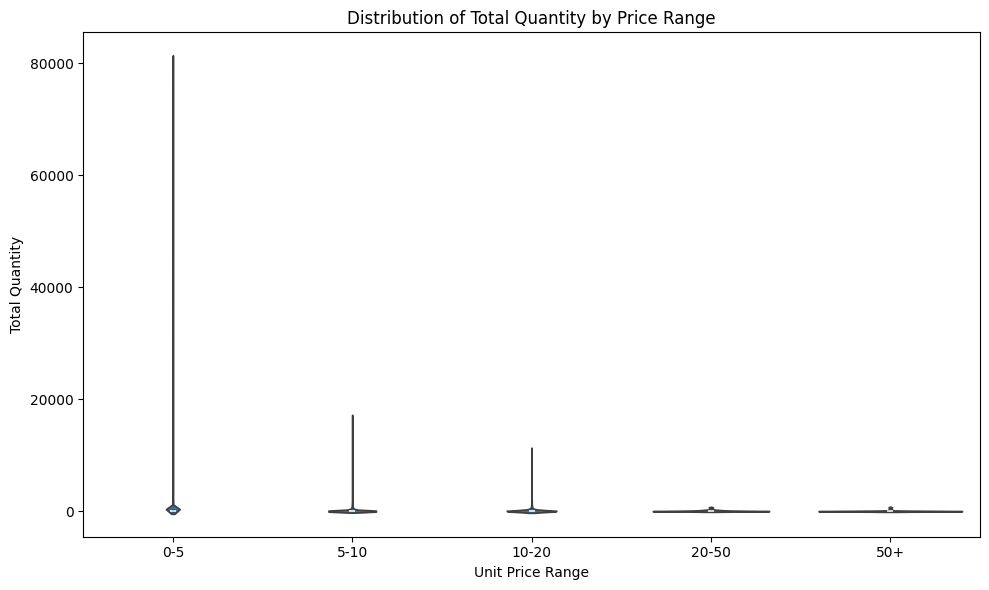

In [161]:
country_sales['Price Range'] = pd.cut(country_sales['UnitPrice'], bins=[0, 5, 10, 20, 50, np.inf], labels=['0-5', '5-10', '10-20', '20-50', '50+'])
plt.figure(figsize=(10, 6))
sns.violinplot(x='Price Range', y='Total Quantity', data=country_sales)
plt.title('Distribution of Total Quantity by Price Range')
plt.xlabel('Unit Price Range')
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

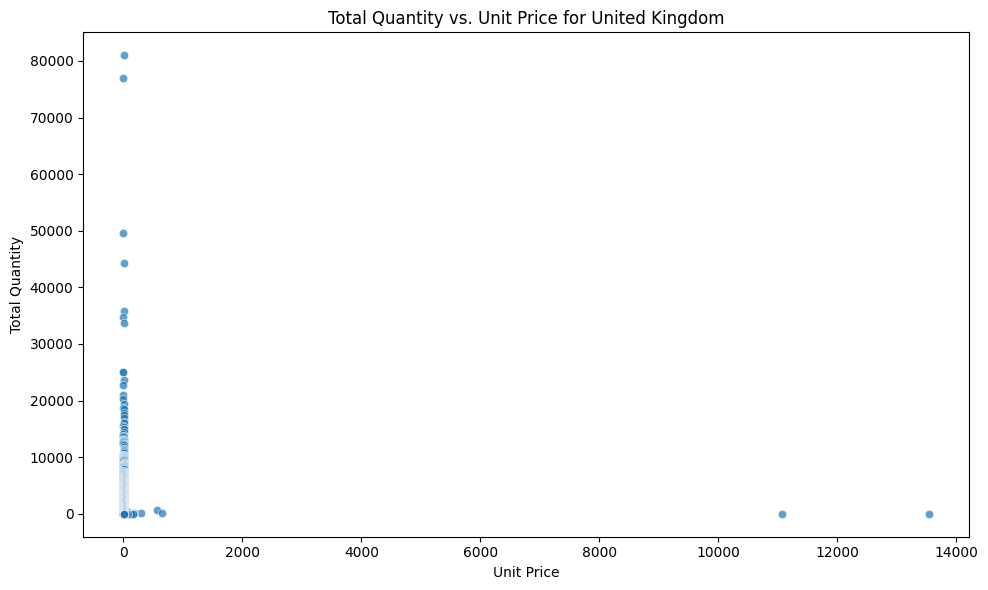

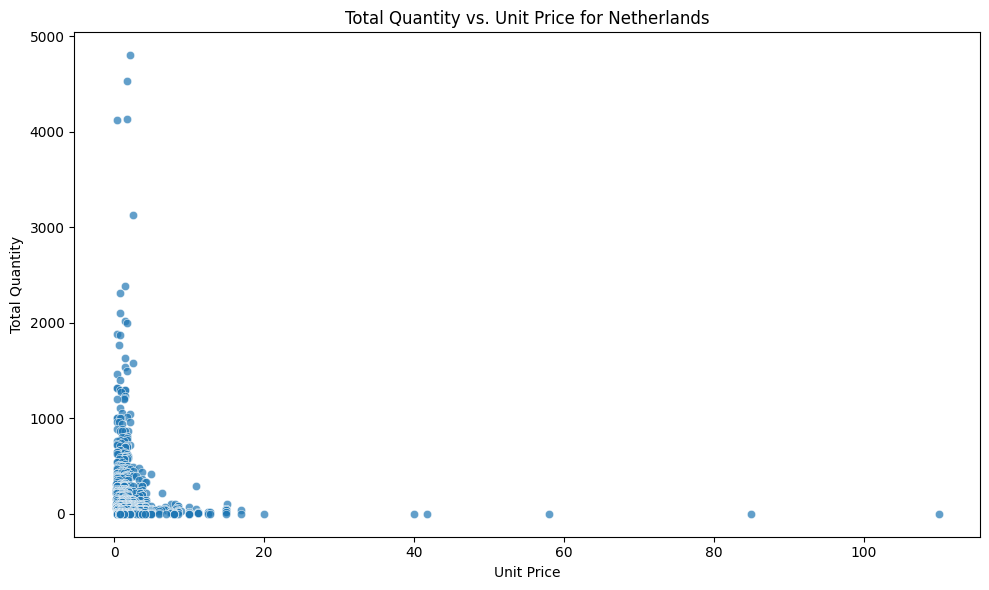

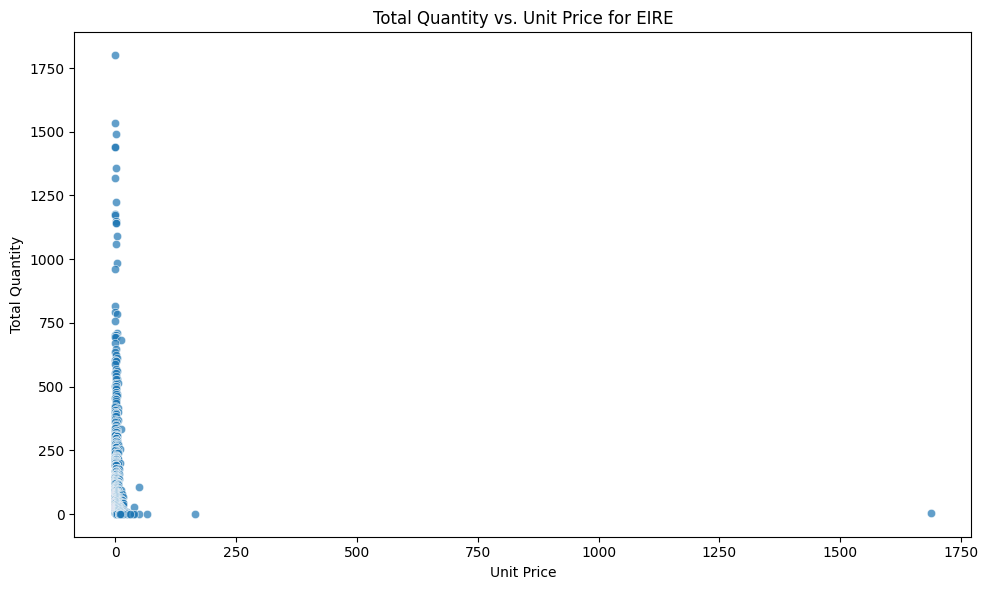

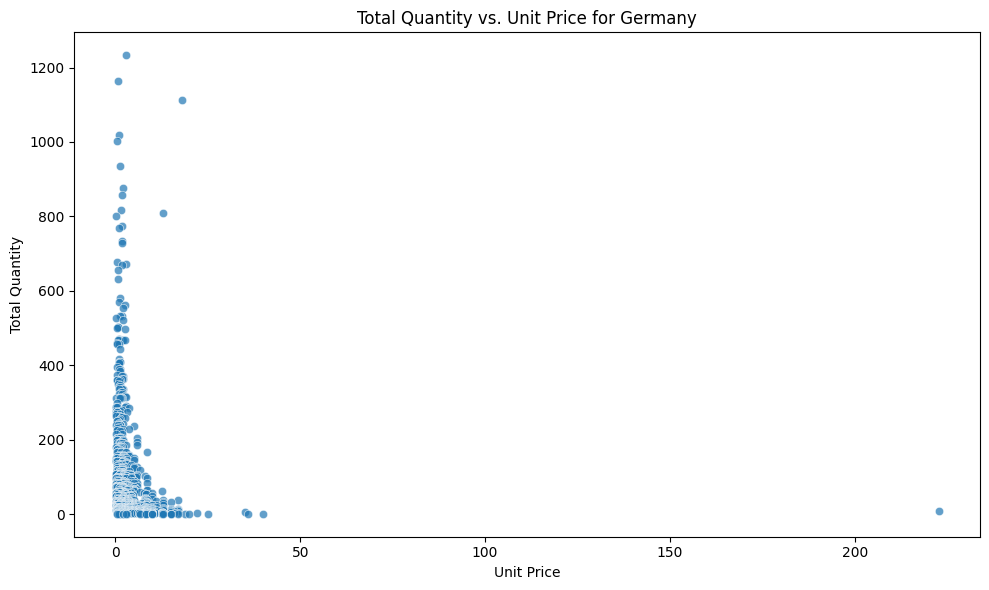

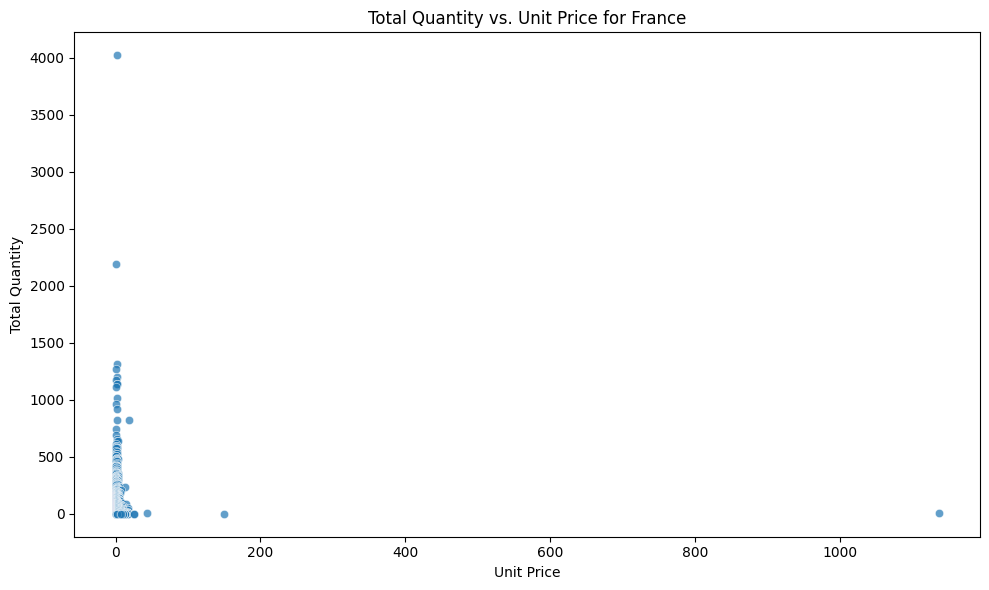

In [162]:
top_5_countries = country_sales.groupby('Country')['Total Quantity'].sum().nlargest(5).index
top_5_data = country_sales[country_sales['Country'].isin(top_5_countries)]
for country in top_5_countries:
    country_data = top_5_data[top_5_data['Country'] == country]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='UnitPrice', y='Total Quantity', data=country_data, alpha=0.7)
    plt.title(f'Total Quantity vs. Unit Price for {country}')
    plt.xlabel('Unit Price')
    plt.ylabel('Total Quantity')
    plt.tight_layout()
    plt.show()

In [163]:
label_encoder = LabelEncoder()
cba_df['Country_Encoded'] = label_encoder.fit_transform(cba_df['Country'])
features = cba_df[['Quantity', 'UnitPrice', 'Amount']]
target = cba_df['Country_Encoded']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cm)

new_data = pd.DataFrame({
    'Quantity': [100],
    'UnitPrice': [0.7],
    'Amount': [70]
})

predicted_country_encoded = model.predict(new_data)
predicted_country = label_encoder.inverse_transform(predicted_country_encoded)[0]
print("Predicted Country:", predicted_country)

Accuracy: 0.9177019219876902
Confusion Matrix: [[   15     0     0 ...     0     0   220]
 [    0     0     0 ...     0     0    84]
 [    0     0     0 ...     0     0     3]
 ...
 [    0     0     0 ...     0     0    37]
 [    0     0     0 ...     0     0    14]
 [   22     0     0 ...     0     0 97011]]
Predicted Country: France
